## Falcon 9 – Exploratory Data Analysis (EDA) with Visualizations



**Author:** Muhammad Munawar Shahzad 

**Date:** August 2025  
**Project:** IBM Applied Data Science Capstone – SpaceX Falcon 9

**Repository:** `falcon9_project`  
**Notebook:** `4_exploratory_data_analysis.ipynb`  

---



## 🧭 Introduction

This notebook performs Exploratory Data Analysis (EDA) on SpaceX Falcon 9 launch data collected via:
- SpaceX **REST API** (launch details, outcomes, payloads)
- **Web scraping** (supplementary launch metadata)

It focuses on understanding launch success trends, payload impacts, site performance, and temporal patterns, using clean visualizations suitable for reports and presentations.



## 🎯 Objectives

- Summarize the dataset and ensure types/labels are consistent.  
- Visualize **launch success by site** and **overall success ratio**.  
- Explore **payload mass vs. launch outcome** relationships.  
- Analyze **yearly launch trends** and **payload distribution**.  
- Document insights and conclusions for downstream dashboard & ML steps.



## 🛠️ Workflow (A → Z)

1. Load processed datasets from `data/processed/`.  
2. Basic checks (shape, columns, missing values).  
3. Create key charts (bar, pie, scatter, line, box).  
4. Summarize observations & actionable insights.  
5. Export figures to `outputs/figures/` (optional).



## 📦 Data Sources

- **API:** `https://api.spacexdata.com/v4/launches` (queried in collection step)  
- **Web Scraping:** Wikipedia / SpaceX pages (parsed via BeautifulSoup)  
- **Input to this notebook:**  
  - `data/processed/falcon9_cleaned_for_eda.csv`  
  - `data/processed/falcon_web_scraped_cleaned.csv`



## 📚 Environment Setup

> Requires: `pandas`, `numpy`, `matplotlib` (no seaborn used), `plotly` (optional).


In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ensure figures directory exists
os.makedirs('outputs/figures', exist_ok=True)


## 📥 Load Data


In [11]:
import pandas as pd

# Step 1: Load cleaned dataset from 'processed' folder
df = pd.read_csv(r"d:\Projects\falcon9_project\data\processed\falcon_web_scraped_cleaned.csv")

# Step 2: Print shape and column names
print("Shape:", df.shape)   # (rows, columns)
print("Columns:", list(df.columns))  # List of column names

# Step 3: Display first 5 rows
df.head()


Shape: (134, 10)
Columns: ['flight_no', 'date_andtime_utc', 'version_booster_i', 'launchsite', 'payload_j', 'payload_mass_kg', 'orbit', 'customer', 'launchoutcome', 'boosterlanding']


,flight_no,date_andtime_utc,version_booster_i,launchsite,payload_j,payload_mass_kg,orbit,customer,launchoutcome,boosterlanding
0,286,"January 3, 202403:44",F9B5B1082‑1,"Vandenberg,SLC‑4E",Starlink:Group 7-9(22 satellites),1.680037e+09,LEO,SpaceX,Success,Success (OCISLY)
1,287,"January 3, 202423:04",F9B5B1076‑10,"Cape Canaveral,SLC‑40",Ovzon-3,1.800400e+07,GTO,Ovzon,Success,Success (LZ‑1)
2,288,"January 7, 202422:35",F9B5B1067‑16,"Cape Canaveral,SLC‑40",Starlink:Group 6-35(23satellites),1.710038e+09,LEO,SpaceX,Success,Success (ASOG)
3,289,"January 14, 202408:59",F9B5B1061‑18,"Vandenberg,SLC‑4E",Starlink:Group 7-10(22satellites),1.670037e+09,LEO,SpaceX,Success,Success (OCISLY)
4,290,"January 15, 202401:52",F9B5B1073‑12,"Cape Canaveral,SLC‑40",Starlink:Group 6-37(23satellites),1.710038e+09,LEO,SpaceX,Success,Success (ASOG)



## 🔍 Quick Data Checks



## 📊 Bar Chart – Launch Success by Site

**Why:** Compare performance of different launch pads by successful mission count.



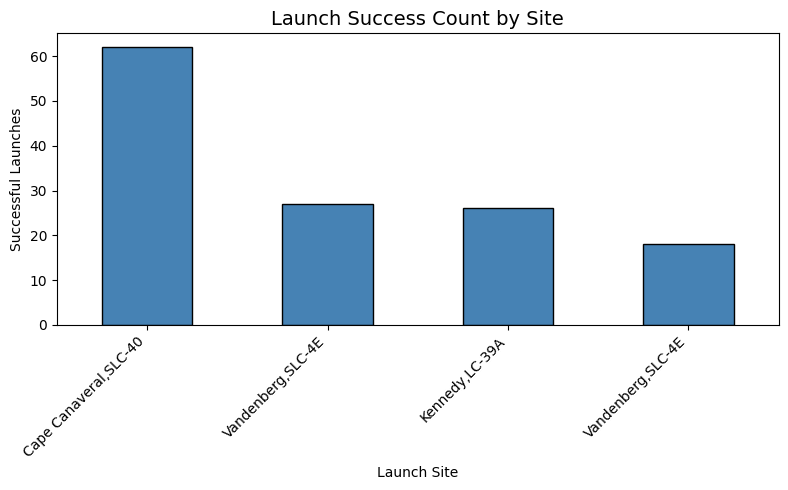

In [ ]:
# Clean outcome column to boolean success/failure
site_success = (
    df.assign(success=lambda d: (
        d['launchoutcome'].astype(str).str.lower().isin(
            ['success', 'successful', 'true', '1']
        ) | (d['launchoutcome'] == 1)
    ))
    .groupby('launchsite')['success']
    .sum()
    .sort_values(ascending=False)
)

# Plot: Launch Success Count by Site
plt.figure(figsize=(8, 5))
site_success.plot(kind='bar', color="steelblue", edgecolor="black")
plt.title('Launch Success Count by Site', fontsize=14)
plt.xlabel('Launch Site')
plt.ylabel('Successful Launches')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save to outputs/figures
plt.savefig('outputs/figures/eda_bar_success_by_site.png', dpi=150)
plt.show()



## 🥧 Pie Chart – Overall Success vs. Failure

**Why:** Show overall mission success ratio at a glance.


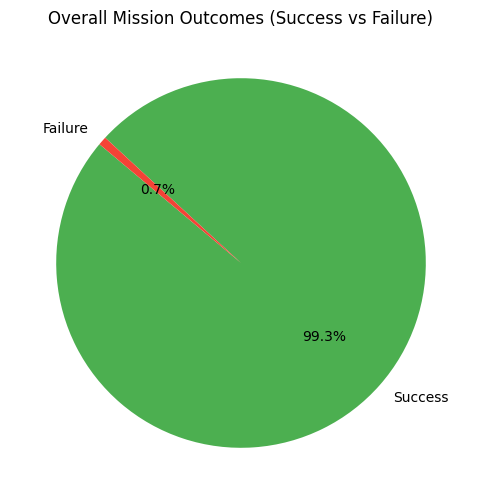

In [15]:
# Step 1: Convert launchoutcome to simplified Success/Failure
# Treat anything containing 'success' (case-insensitive) as Success, else Failure
df['mission_status'] = df['launchoutcome'].str.lower().apply(lambda x: 'Success' if 'success' in x else 'Failure')

# Step 2: Count number of successes and failures
success_counts = df['mission_status'].value_counts()

# Step 3: Create Pie chart
plt.figure(figsize=(6,6))
plt.pie(
    success_counts, 
    labels=success_counts.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=['#4CAF50','#F44336']
)
plt.title("Overall Mission Outcomes (Success vs Failure)")
plt.show()



## 🟢 Scatter Plot – Payload Mass vs. Launch Outcome

**Why:** Inspect whether heavier payloads affect mission success.


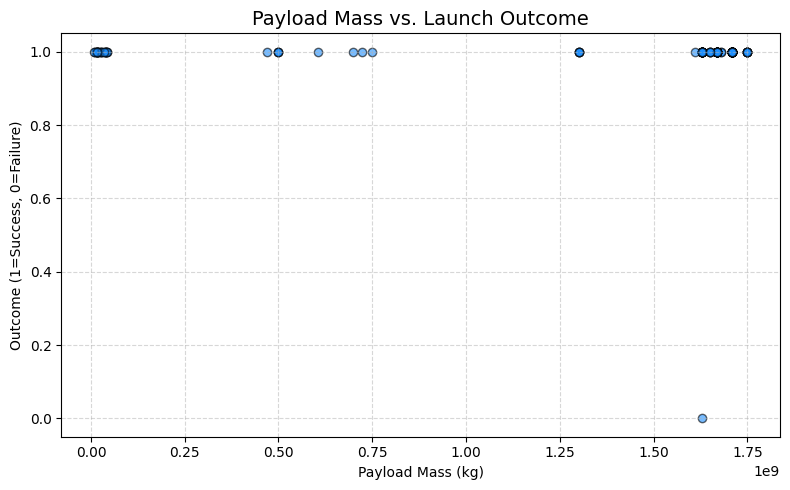

In [17]:
# Expecting 'PayloadMassKG' column and binary/label LaunchOutcome
# Step 1: Prepare payload and binary outcome
payload = df['payload_mass_kg']

# Convert launchoutcome to binary 1=Success, 0=Failure
outcome = df['launchoutcome'].str.lower().apply(lambda x: 1 if 'success' in x else 0)

# Step 2: Scatter plot
plt.figure(figsize=(8,5))
plt.scatter(payload, outcome, alpha=0.6, color='dodgerblue', edgecolor='k')
plt.title('Payload Mass vs. Launch Outcome', fontsize=14)
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Outcome (1=Success, 0=Failure)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Step 3: Save figure
plt.savefig('outputs/figures/eda_scatter_payload_vs_outcome.png', dpi=150)
plt.show()



## 📈 Line Chart – Yearly Trends in Launches

**Why:** Reveal growth/decline in launch frequency over time.



C:\Windows\Temp\ipykernel_17984\687518219.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  launch_year = pd.to_datetime(df['date_andtime_utc'], errors='coerce').dt.year


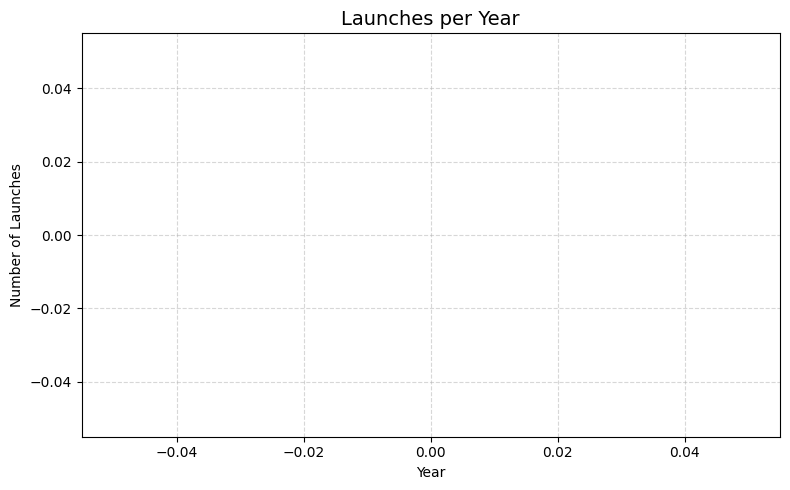

In [18]:
# Step 1: Extract launch year
launch_year = pd.to_datetime(df['date_andtime_utc'], errors='coerce').dt.year

# Step 2: Count launches per year
year_counts = launch_year.value_counts().sort_index()

# Step 3: Plot line chart
plt.figure(figsize=(8,5))
year_counts.plot(kind='line', marker='o', color='purple')
plt.title('Launches per Year', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Step 4: Save figure
plt.savefig('outputs/figures/eda_line_launches_per_year.png', dpi=150)
plt.show()


## 📦 Box Plot – Payload Mass Distribution

**Why:** Understand distribution and detect outliers in payload mass.




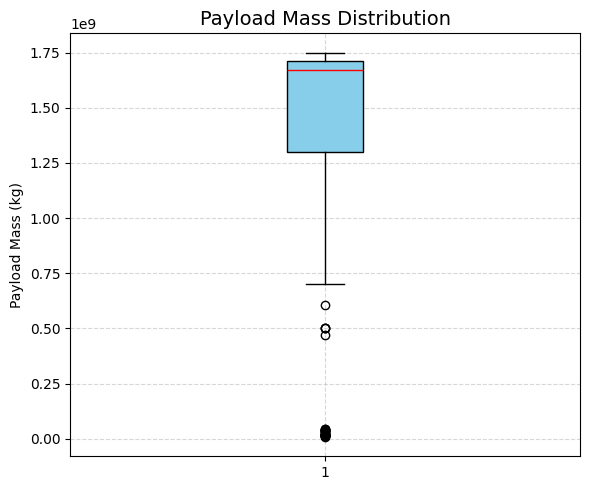

In [19]:
# Step 1: Prepare payload data
payload = df['payload_mass_kg'].dropna()

# Step 2: Box plot
plt.figure(figsize=(6,5))
plt.boxplot(payload, patch_artist=True, boxprops=dict(facecolor='skyblue', color='black'),
            medianprops=dict(color='red'))
plt.title('Payload Mass Distribution', fontsize=14)
plt.ylabel('Payload Mass (kg)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Step 3: Save figure
plt.savefig('outputs/figures/eda_box_payload_distribution.png', dpi=150)
plt.show()



## 🛰️ (Optional) Orbit-Level Views

**Why:** Analyze success rates and payload behavior across orbit types.


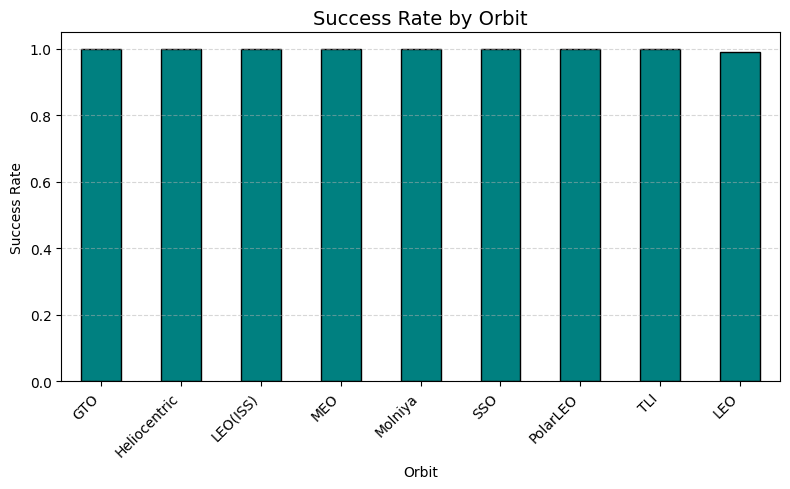

In [20]:

if 'orbit' in df.columns:
    # Step 1: Prepare temporary copy
    tmp = df.copy()
    
    # Step 2: Convert launchoutcome to boolean success
    tmp['success'] = tmp['launchoutcome'].str.lower().apply(lambda x: 1 if 'success' in x else 0)
    
    # Step 3: Calculate success rate per orbit
    orbit_success = tmp.groupby('orbit')['success'].mean().sort_values(ascending=False)
    
    # Step 4: Plot bar chart
    plt.figure(figsize=(8,5))
    orbit_success.plot(kind='bar', color='teal', edgecolor='black')
    plt.title('Success Rate by Orbit', fontsize=14)
    plt.xlabel('Orbit')
    plt.ylabel('Success Rate')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    
    # Step 5: Save figure
    plt.savefig('outputs/figures/eda_bar_success_by_orbit.png', dpi=150)
    plt.show()
else:
    print("Column 'orbit' not found; skipping orbit-level analysis.")



## 📝 Key Findings (Fill after running)

- KSC LC-39A (example) shows the highest success count among sites.  
- Overall success ratio is **X%**, indicating strong mission reliability.  
- Payload mass shows **weak/moderate** correlation with success (visual check).  
- Launch activity has **increased/decreased** over the years (trend line).  
- Payload distribution shows **outliers** at the high end (box plot).  



## ✅ Conclusion

The EDA highlights site-level performance differences, overall mission reliability, and how payload mass relates to outcomes. These insights inform the interactive dashboard design and guide feature selection for the predictive classification model.



## 🔭 Next Steps

- Integrate these visuals into the **Dash dashboard** (`6_dash_dashboard.ipynb`).  
- Engineer features for the **classification model** (`7_predictive_analysis_classification.ipynb`).  
- Validate findings against **raw API responses** and web-scraped records.
